<a href="https://colab.research.google.com/github/pucuk-yusup/Portofolio-Analisis/blob/main/TheLook_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#jawaban no 5
import pandas as pd

# Ganti 'nama_file.csv' sesuai dengan nama file CSV yang lo upload
df = pd.read_csv("/content/bquxjob_7490b5dd_19591f519ea.csv")

# Cek 5 data teratas
df.head()


,month,product_category,total_inventory,prev_inventory,growth_percentage
0,2023-04-01 00:00:00.000000 UTC,Dresses,9788.009095,22147.959279,-55.81
1,2023-04-01 00:00:00.000000 UTC,Socks,3267.030400,7807.959108,-58.16
2,2023-04-01 00:00:00.000000 UTC,Leggings,1912.779790,4851.024833,-60.57
3,2023-04-01 00:00:00.000000 UTC,Socks & Hosiery,964.469265,2498.498954,-61.40
4,2023-04-01 00:00:00.000000 UTC,Swim,12365.703786,32880.204008,-62.39


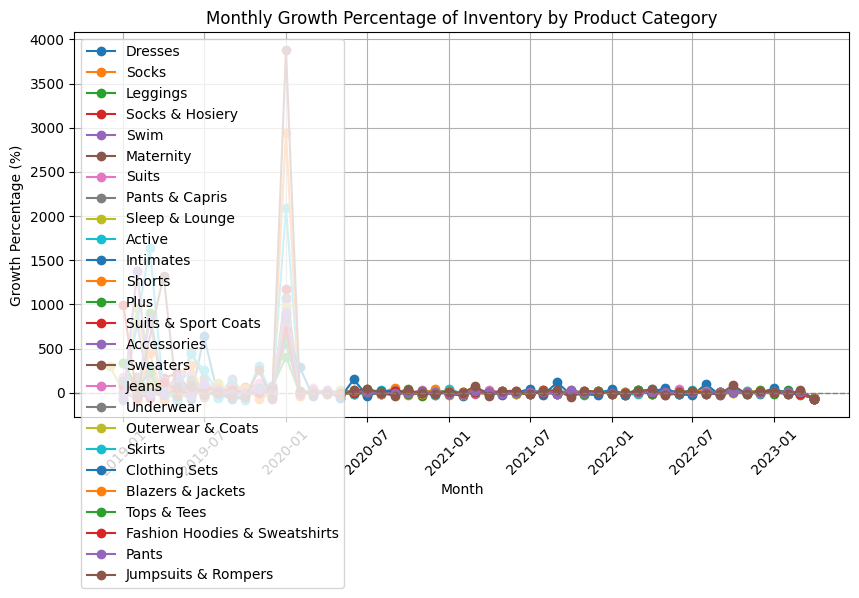

In [2]:
import matplotlib.pyplot as plt

# Convert kolom 'month' ke datetime kalau belum
df['month'] = pd.to_datetime(df['month'])

# Plot line chart untuk growth percentage
plt.figure(figsize=(10, 5))
for category in df['product_category'].unique():
    subset = df[df['product_category'] == category]
    plt.plot(subset['month'], subset['growth_percentage'], marker='o', label=category)

plt.title('Monthly Growth Percentage of Inventory by Product Category')
plt.xlabel('Month')
plt.ylabel('Growth Percentage (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Reference line at 0%
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

#simpan visualiztion
plt.savefig("growth_percentage_chart.png", dpi=300, bbox_inches='tight')

#menampilkan
plt.show()


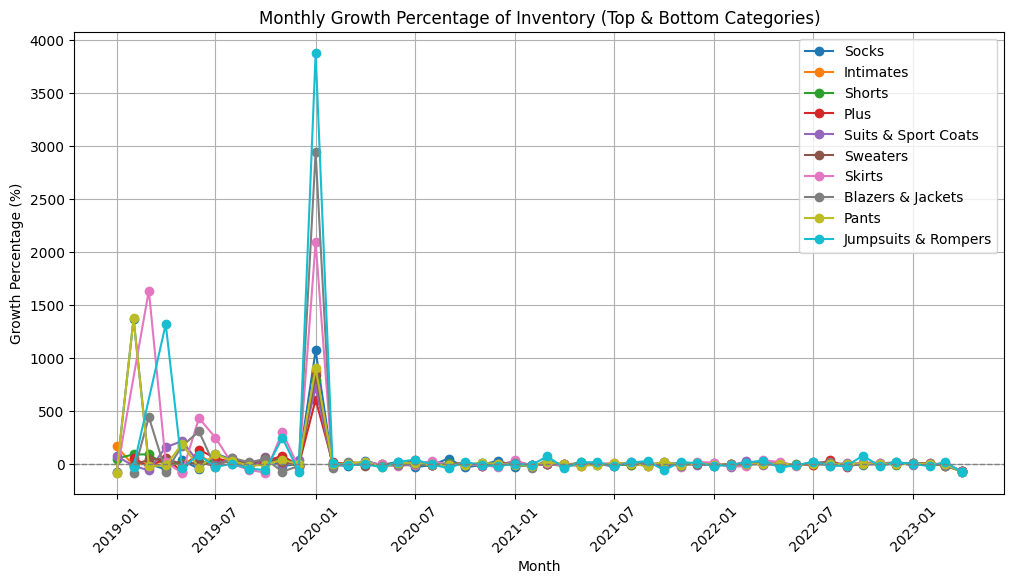

In [4]:
import matplotlib.pyplot as plt

# Filter hanya kategori dengan growth_percentage tertinggi & terendah
top_categories = df.groupby("product_category")["growth_percentage"].mean().nlargest(5).index
bottom_categories = df.groupby("product_category")["growth_percentage"].mean().nsmallest(5).index
selected_categories = list(top_categories) + list(bottom_categories)

df_filtered = df[df["product_category"].isin(selected_categories)]

# Plot ulang dengan hanya kategori yang dipilih
plt.figure(figsize=(12, 6))
for category in df_filtered['product_category'].unique():
    subset = df_filtered[df_filtered['product_category'] == category]
    plt.plot(subset['month'], subset['growth_percentage'], marker='o', label=category)

plt.title('Monthly Growth Percentage of Inventory (Top & Bottom Categories)')
plt.xlabel('Month')
plt.ylabel('Growth Percentage (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Reference line at 0%
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Simpan gambar ke file PNG
plt.savefig("growth_percentage_chart.png", dpi=300, bbox_inches='tight')

# Tampilkan plot
plt.show()


In [5]:
#unduh visualization
from google.colab import files
files.download("growth_percentage_chart.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

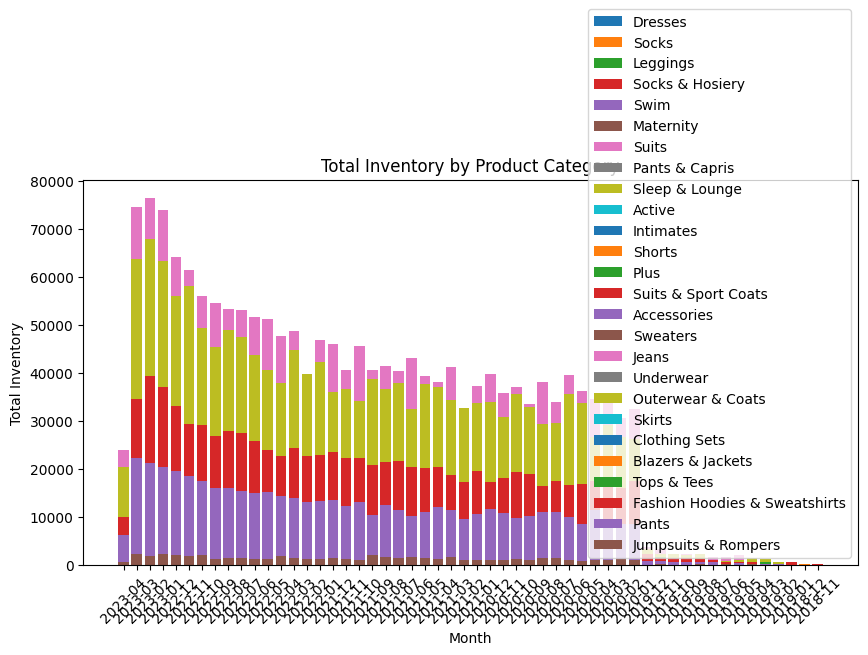

In [6]:
plt.figure(figsize=(10, 5))
for category in df['product_category'].unique():
    subset = df[df['product_category'] == category]
    plt.bar(subset['month'].dt.strftime('%Y-%m'), subset['total_inventory'], label=category)

plt.title('Total Inventory by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.legend()
plt.xticks(rotation=45)

# Simpan gambar ke file PNG
plt.savefig("total_inventory.png", dpi=300, bbox_inches='tight')

plt.show()


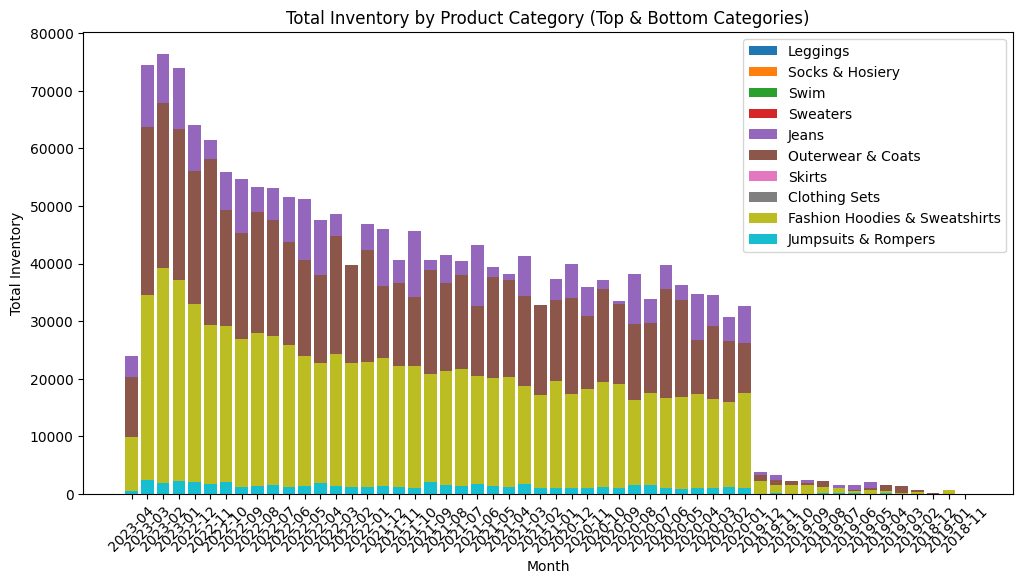

In [7]:
import matplotlib.pyplot as plt

# Filter kategori dengan total inventory terbesar & terkecil
top_categories = df.groupby("product_category")["total_inventory"].sum().nlargest(5).index
bottom_categories = df.groupby("product_category")["total_inventory"].sum().nsmallest(5).index
selected_categories = list(top_categories) + list(bottom_categories)

df_filtered = df[df["product_category"].isin(selected_categories)]

# Plot ulang dengan kategori yang sudah difilter
plt.figure(figsize=(12, 6))
for category in df_filtered['product_category'].unique():
    subset = df_filtered[df_filtered['product_category'] == category]
    plt.bar(subset['month'].dt.strftime('%Y-%m'), subset['total_inventory'], label=category)

plt.title('Total Inventory by Product Category (Top & Bottom Categories)')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.legend()
plt.xticks(rotation=45)

# Simpan gambar ke file PNG
plt.savefig("total_inventory_filtered.png", dpi=300, bbox_inches='tight')

plt.show()


In [16]:
#unduh visualization
from google.colab import files
files.download("total_inventory_filtered.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
#buat forecasting prophet
import pandas as pd

# Load dataset dari file CSV
file_path = "/content/bquxjob_7490b5dd_19591f519ea.csv"
df = pd.read_csv(file_path)

# Cek 5 baris pertama
df.head()

,month,product_category,total_inventory,prev_inventory,growth_percentage
0,2023-04-01 00:00:00.000000 UTC,Dresses,9788.009095,22147.959279,-55.81
1,2023-04-01 00:00:00.000000 UTC,Socks,3267.030400,7807.959108,-58.16
2,2023-04-01 00:00:00.000000 UTC,Leggings,1912.779790,4851.024833,-60.57
3,2023-04-01 00:00:00.000000 UTC,Socks & Hosiery,964.469265,2498.498954,-61.40
4,2023-04-01 00:00:00.000000 UTC,Swim,12365.703786,32880.204008,-62.39


In [12]:
# Pastikan kolom month dalam format datetime
df['month'] = pd.to_datetime(df['month']).dt.tz_localize(None)

# Rename kolom supaya sesuai dengan format Prophet
df_prophet = df[['month', 'growth_percentage']].rename(columns={'month': 'ds', 'growth_percentage': 'y'})

# Cek dataset yang akan digunakan
df_prophet.head()

,ds,y
0,2023-04-01,-55.81
1,2023-04-01,-58.16
2,2023-04-01,-60.57
3,2023-04-01,-61.40
4,2023-04-01,-62.39


In [13]:
!pip install prophet
from prophet import Prophet

# Inisialisasi model Prophet
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph5o1jz1y/4v4s396w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph5o1jz1y/4aeqqku1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45209', 'data', 'file=/tmp/tmph5o1jz1y/4v4s396w.json', 'init=/tmp/tmph5o1jz1y/4aeqqku1.json', 'output', 'file=/tmp/tmph5o1jz1y/prophet_modell_86kom5/prophet_model-20250314005301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:53:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:53:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


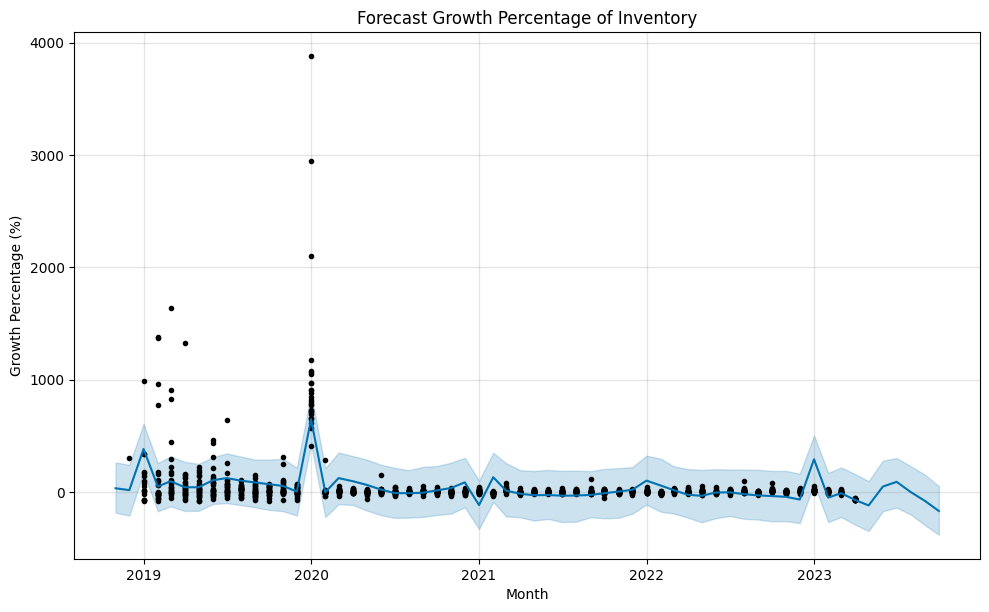

In [14]:
# Buat dataframe tanggal untuk prediksi (6 bulan ke depan)
future = model.make_future_dataframe(periods=6, freq='M')

# Prediksi
forecast = model.predict(future)

# Plot hasil prediksi
fig = model.plot(forecast)
plt.title("Forecast Growth Percentage of Inventory")
plt.xlabel("Month")
plt.ylabel("Growth Percentage (%)")

# Simpan gambar ke file PNG
plt.savefig("forecast_growth_percentage.png", dpi=300, bbox_inches='tight')

#hasil visualization
plt.show()


In [15]:
#unduh visualization forecast
from google.colab import files
files.download("forecast_growth_percentage.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
#jawaban no 6
import pandas as pd

# Load dataset dari file CSV
file_path = "/content/Cohort_Analysis.csv"
df = pd.read_csv(file_path)

# Pastikan kolom datetime benar
df['first_purchase_month'] = pd.to_datetime(df['first_purchase_month']).dt.tz_localize(None)
df['purchase_month'] = pd.to_datetime(df['purchase_month'])

# Hitung selisih bulan antara pembelian pertama dan bulan transaksi (Cohort Index)
df['cohort_index'] = ((df['purchase_month'].dt.year - df['first_purchase_month'].dt.year) * 12 +
                      (df['purchase_month'].dt.month - df['first_purchase_month'].dt.month))

# Pivot tabel untuk Heatmap
cohort_pivot = df.pivot(index='first_purchase_month', columns='cohort_index', values='retention_rate')

# Cek hasil
cohort_pivot.head()


cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2022-01-01,100.0,3.52,3.86,3.73,3.83,3.76,4.17,3.14,4.03,4.55,3.11,3.83
2022-02-01,100.0,4.13,4.43,3.83,4.36,4.40,4.10,3.91,3.98,3.83,4.21,NaN
2022-03-01,100.0,4.62,4.06,3.96,4.39,4.52,3.43,3.99,3.63,3.93,NaN,NaN
2022-04-01,100.0,3.69,3.92,4.81,3.72,4.52,4.42,4.05,3.78,NaN,NaN,NaN
2022-05-01,100.0,4.51,4.48,4.17,4.45,4.58,4.42,4.98,NaN,NaN,NaN,NaN


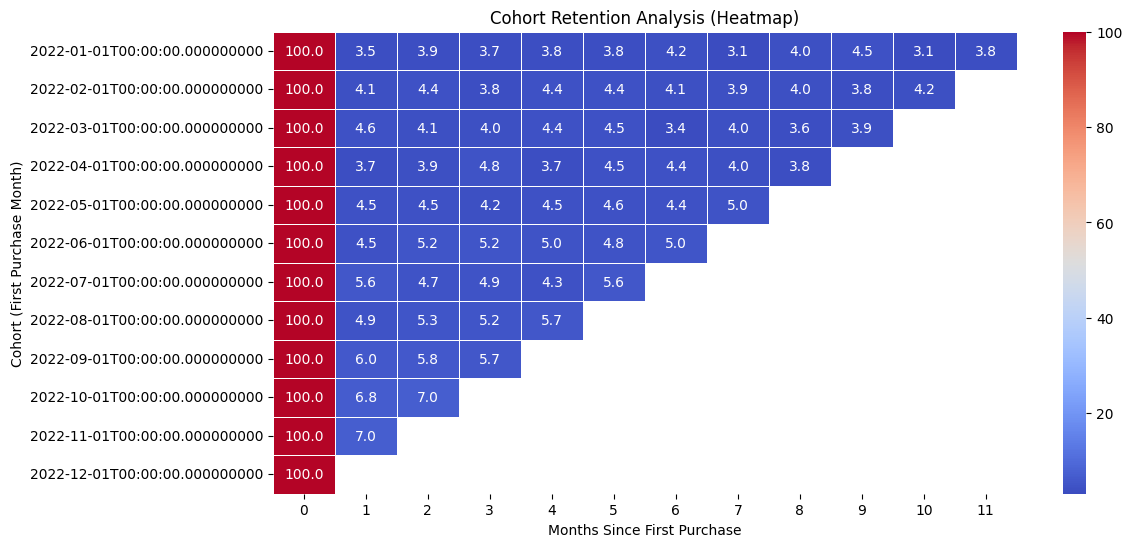

In [22]:
#visulaisasi cohort
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

plt.title("Cohort Retention Analysis (Heatmap)")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort (First Purchase Month)")

# Simpan gambar ke file PNG
plt.savefig("cohort_analysis.png", dpi=300, bbox_inches='tight')

#tampilkan visualiasi
plt.show()


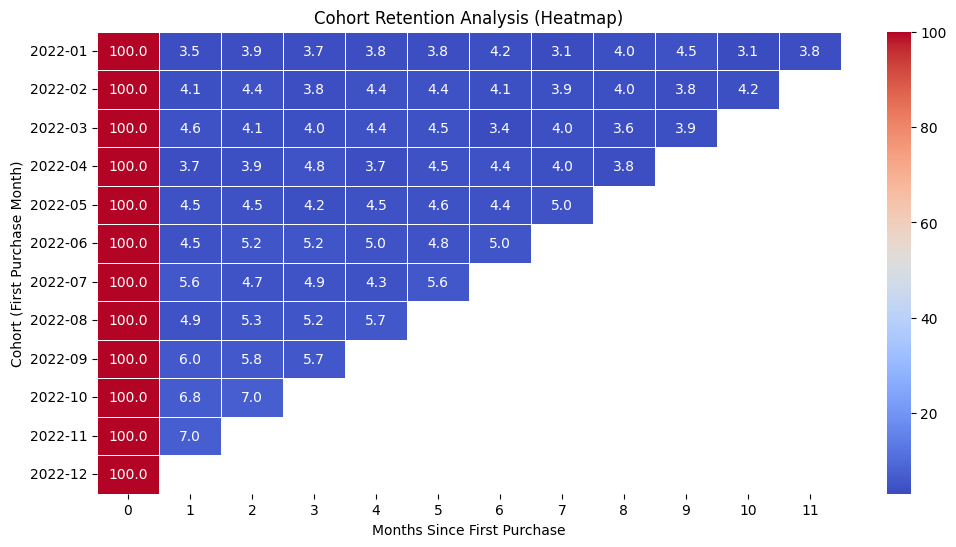

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Format cohort index supaya hanya tampil Tahun-Bulan
cohort_pivot.index = cohort_pivot.index.strftime('%Y-%m')

plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

plt.title("Cohort Retention Analysis (Heatmap)")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort (First Purchase Month)")

# Simpan gambar ke file PNG
plt.savefig("cohort_analysis_modify.png", dpi=300, bbox_inches='tight')

# Tampilkan visualisasi
plt.show()


In [24]:
#unduh visualization cohort analysis
from google.colab import files
files.download("cohort_analysis_modify.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

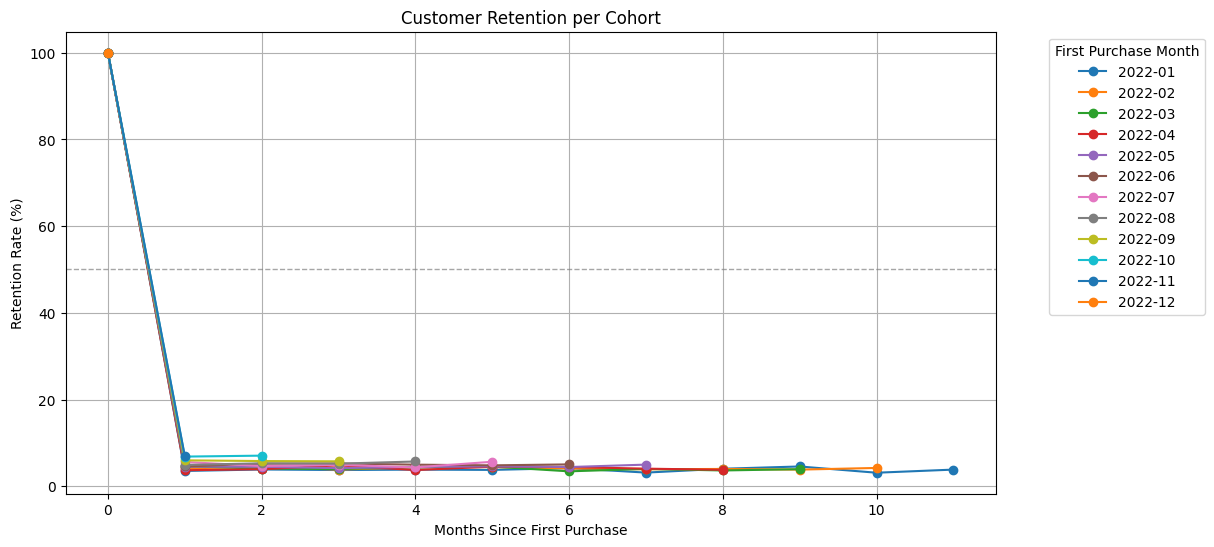

In [27]:
#Line Chart Retention per Cohort

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot setiap cohort sebagai garis
for index, row in cohort_pivot.iterrows():
    plt.plot(row.index, row.values, marker='o', label=str(index))  # Tidak perlu pakai .date()

plt.title("Customer Retention per Cohort")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Retention Rate (%)")
plt.axhline(50, color='gray', linestyle='--', linewidth=1, alpha=0.7)  # Garis referensi 50%
plt.legend(title="First Purchase Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Simpan gambar ke file PNG
plt.savefig("cohort_line_chart.png", dpi=300, bbox_inches='tight')

#tampilkan visualiasasi
plt.show()

In [28]:
#unduh visualizationnya cohort line chart
from google.colab import files
files.download("cohort_line_chart.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
#bikin 3d line chart cohort
import pandas as pd

# Load dataset dari file CSV
file_path = "/content/Cohort_Analysis.csv"
df = pd.read_csv(file_path)

# Pastikan kolom datetime benar
df['first_purchase_month'] = pd.to_datetime(df['first_purchase_month'])
df['purchase_month'] = pd.to_datetime(df['purchase_month'])

# Hitung selisih bulan antara pembelian pertama dan bulan transaksi (Cohort Index)
df['cohort_index'] = ((df['purchase_month'].dt.year - df['first_purchase_month'].dt.year) * 12 +
                      (df['purchase_month'].dt.month - df['first_purchase_month'].dt.month))

# Pivot tabel untuk Cohort Retention
cohort_pivot = df.pivot(index='first_purchase_month', columns='cohort_index', values='retention_rate')

# Ubah index ke format YYYY-MM biar lebih rapi
cohort_pivot.index = cohort_pivot.index.strftime('%Y-%m')

# Cek hasil
cohort_pivot.head()

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2022-01,100.0,3.52,3.86,3.73,3.83,3.76,4.17,3.14,4.03,4.55,3.11,3.83
2022-02,100.0,4.13,4.43,3.83,4.36,4.40,4.10,3.91,3.98,3.83,4.21,NaN
2022-03,100.0,4.62,4.06,3.96,4.39,4.52,3.43,3.99,3.63,3.93,NaN,NaN
2022-04,100.0,3.69,3.92,4.81,3.72,4.52,4.42,4.05,3.78,NaN,NaN,NaN
2022-05,100.0,4.51,4.48,4.17,4.45,4.58,4.42,4.98,NaN,NaN,NaN,NaN


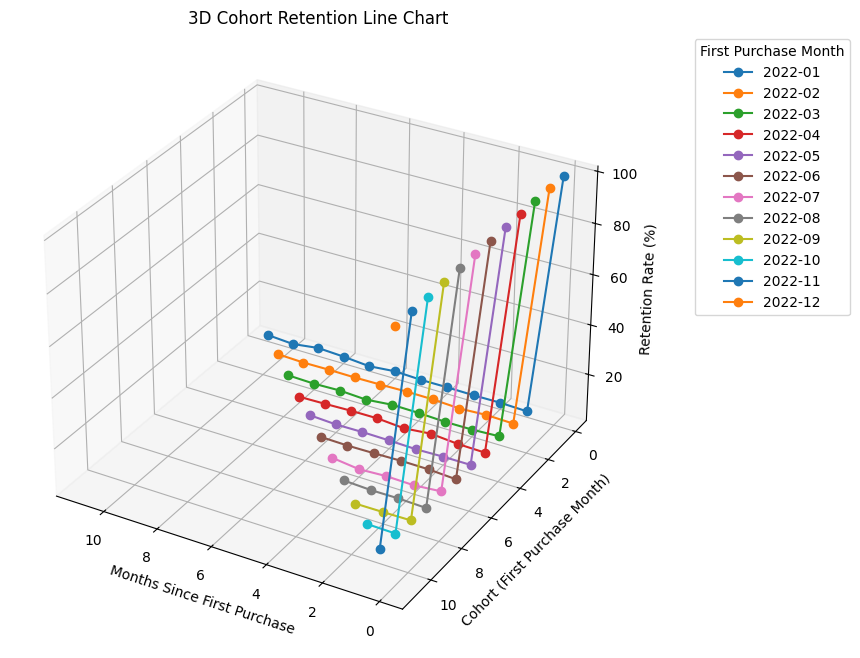

In [32]:
#buat visualiasi 3d

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Siapkan figure 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Konversi index cohort_pivot ke angka untuk sumbu Y
Y = np.arange(len(cohort_pivot))  # First Purchase Month (Cohort Order)
X = cohort_pivot.columns.astype(int)  # Months Since First Purchase
Z = cohort_pivot.values  # Retention Rate

# Plot setiap cohort sebagai garis di grafik 3D
for i in range(len(cohort_pivot)):
    ax.plot(X, np.full_like(X, Y[i]), Z[i], marker='o', label=str(cohort_pivot.index[i]))

# Label sumbu
ax.set_xlabel("Months Since First Purchase")
ax.set_ylabel("Cohort (First Purchase Month)")
ax.set_zlabel("Retention Rate (%)")
ax.set_title("3D Cohort Retention Line Chart")

# Atur sudut pandang
ax.view_init(elev=30, azim=120)  # Adjust perspektif biar lebih jelas

# Tampilkan legend
ax.legend(title="First Purchase Month", bbox_to_anchor=(1.1, 1), loc='upper left')

# Simpan gambar ke file PNG
plt.savefig("cohort_3D.png", dpi=300, bbox_inches='tight')

# Tampilkan plot
plt.show()

In [33]:
#unduh visualizationnya cohort 3D
from google.colab import files
files.download("cohort_3D.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
#buat gif
import imageio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# Ukuran standar yang akan dipakai untuk semua frame
standard_size = (800, 600)

# Buat list untuk menyimpan setiap frame gambar
frames = []

# Loop untuk mengubah sudut pandang dan simpan gambar
for angle in range(0, 360, 5):  # Putar dari 0 hingga 360 derajat
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(cohort_pivot)):
        ax.plot(X, np.full_like(X, Y[i]), Z[i], marker='o', label=str(cohort_pivot.index[i]))

    ax.set_xlabel("Months Since First Purchase")
    ax.set_ylabel("Cohort (First Purchase Month)")
    ax.set_zlabel("Retention Rate (%)")
    ax.set_title("3D Cohort Retention Line Chart")
    ax.view_init(elev=30, azim=angle)  # Ubah sudut pandang

    # Pastikan semua frame punya ukuran yang sama
    fig.tight_layout()

    # Simpan frame sementara
    filename = f"frame_{angle}.png"
    plt.savefig(filename, dpi=150, bbox_inches='tight', transparent=True)
    plt.close()

    # Baca gambar dan resize agar ukurannya konsisten
    img = Image.open(filename).resize(standard_size, Image.ANTIALIAS)
    frames.append(img)

# Simpan sebagai GIF
frames[0].save("cohort_retention_3d.gif", save_all=True, append_images=frames[1:], duration=100, loop=0)


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

In [37]:
#perbaikan gif

import imageio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# Ukuran standar yang akan dipakai untuk semua frame
standard_size = (800, 600)

# Buat list untuk menyimpan setiap frame gambar
frames = []

# Loop untuk mengubah sudut pandang dan simpan gambar
for angle in range(0, 360, 5):  # Putar dari 0 hingga 360 derajat
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(cohort_pivot)):
        ax.plot(X, np.full_like(X, Y[i]), Z[i], marker='o', label=str(cohort_pivot.index[i]))

    ax.set_xlabel("Months Since First Purchase")
    ax.set_ylabel("Cohort (First Purchase Month)")
    ax.set_zlabel("Retention Rate (%)")
    ax.set_title("3D Cohort Retention Line Chart")
    ax.view_init(elev=30, azim=angle)  # Ubah sudut pandang

    # Pastikan semua frame punya ukuran yang sama
    fig.tight_layout()

    # Simpan frame sementara
    filename = f"frame_{angle}.png"
    plt.savefig(filename, dpi=150, bbox_inches='tight', transparent=True)
    plt.close()

    # Baca gambar dan resize agar ukurannya konsisten
    img = Image.open(filename).resize(standard_size, Image.Resampling.LANCZOS)  # Fix deprecated method
    frames.append(img)

# Simpan sebagai GIF
frames[0].save("cohort_retention_3d.gif", save_all=True, append_images=frames[1:], duration=100, loop=0)


In [38]:
# Download file GIF ke komputer
from google.colab import files
files.download("cohort_retention_3d.gif")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>